# Reconocimiento Facial

In [11]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [4]:
print(faces.target_names) # ver los nombres de las caras

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [5]:
print(faces.images.shape)

(1348, 62, 47)


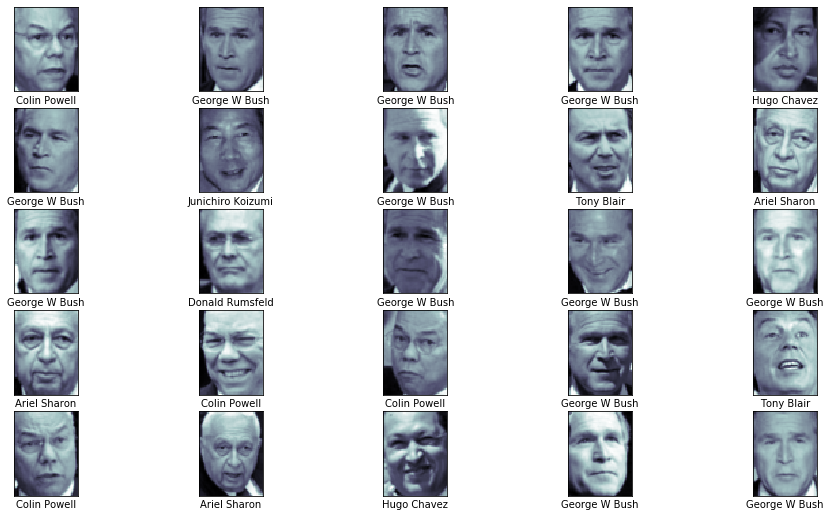

In [8]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [12]:
62*47 # cantidad de variables

2914

In [14]:
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline # toberias

In [15]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

CPU times: user 3min 37s, sys: 6.29 s, total: 3min 43s
Wall time: 2min 12s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            ran

In [23]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [25]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imágnes (incorrectas en rojo)')

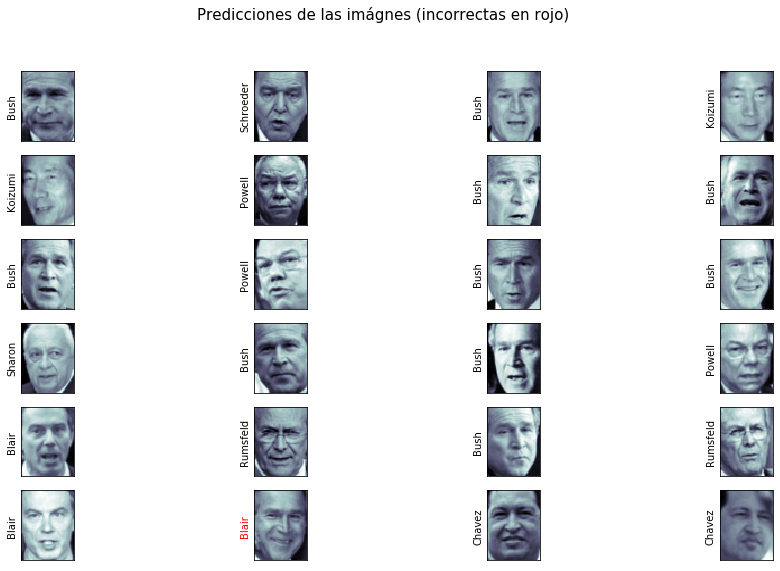

In [32]:
fig, ax = plt.subplots(6,4,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")

fig.suptitle("Predicciones de las imágnes (incorrectas en rojo)", size = 15)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
mat = confusion_matrix(Ytest, yfit)

In [37]:
import seaborn as sns; sns.set()# para la matrix de confucion

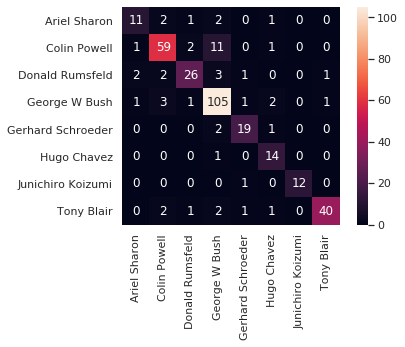

In [38]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names )